In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100,1)

In [4]:
X

array([[0.77102835],
       [0.19029566],
       [0.86084034],
       [0.07216434],
       [0.06770611],
       [0.15965073],
       [0.11545113],
       [0.92062772],
       [0.25499782],
       [0.04394727],
       [0.42159341],
       [0.14152326],
       [0.18974346],
       [0.0198253 ],
       [0.68001612],
       [0.31406803],
       [0.25837062],
       [0.32011061],
       [0.90170686],
       [0.95397261],
       [0.84761055],
       [0.87575686],
       [0.63375045],
       [0.90048067],
       [0.66199115],
       [0.28868428],
       [0.81295313],
       [0.89768158],
       [0.63331856],
       [0.60460113],
       [0.03645026],
       [0.3375925 ],
       [0.15151525],
       [0.51622427],
       [0.76110243],
       [0.09692871],
       [0.29530206],
       [0.28490188],
       [0.28993279],
       [0.0547597 ],
       [0.61155795],
       [0.92327089],
       [0.22638598],
       [0.4127663 ],
       [0.85116508],
       [0.27529415],
       [0.88006604],
       [0.249

In [50]:
y = 4 + 3*X + np.random.randn(100,1)

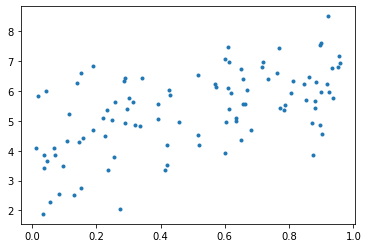

In [51]:
plt.plot(X,y,".")

In [52]:
X_b = np.c_[np.ones((100,1)),X]    # add X0 = 1 to each instance

X_b

array([[1.        , 0.77102835],
       [1.        , 0.19029566],
       [1.        , 0.86084034],
       [1.        , 0.07216434],
       [1.        , 0.06770611],
       [1.        , 0.15965073],
       [1.        , 0.11545113],
       [1.        , 0.92062772],
       [1.        , 0.25499782],
       [1.        , 0.04394727],
       [1.        , 0.42159341],
       [1.        , 0.14152326],
       [1.        , 0.18974346],
       [1.        , 0.0198253 ],
       [1.        , 0.68001612],
       [1.        , 0.31406803],
       [1.        , 0.25837062],
       [1.        , 0.32011061],
       [1.        , 0.90170686],
       [1.        , 0.95397261],
       [1.        , 0.84761055],
       [1.        , 0.87575686],
       [1.        , 0.63375045],
       [1.        , 0.90048067],
       [1.        , 0.66199115],
       [1.        , 0.28868428],
       [1.        , 0.81295313],
       [1.        , 0.89768158],
       [1.        , 0.63331856],
       [1.        , 0.60460113],
       [1.

In [53]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [54]:
theta_best

array([[4.07761136],
       [2.51398848]])

We would have expected 0o = 4 and 01(Theta 1) = 3 instead of above values as we have the Guassian Noise which made it impossible to recover the exact parameters

In [55]:
X_new = np.array([[0],[2]])

In [56]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [57]:
X_new_b



array([[1., 0.],
       [1., 2.]])

In [58]:
y_predict = X_new_b.dot(theta_best)

In [59]:
y_predict

array([[4.07761136],
       [9.10558832]])

[0, 2, 0, 15]

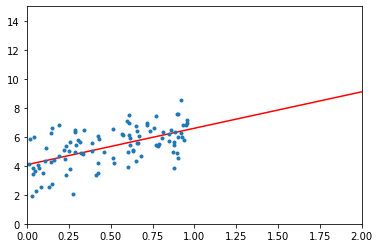

In [60]:
plt.plot(X_new,y_predict,"r")
plt.plot(X,y,".")
plt.axis([0,2,0,15])

The Equivalent code using scikit - learn looks like this:

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.07761136]), array([[2.51398848]]))

In [64]:
lin_reg.predict(X_new)

array([[4.07761136],
       [9.10558832]])

# Gradient Descent

In [65]:
eta = 0.1  #Learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [66]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [67]:
theta

array([[4.0776118 ],
       [2.51398767]])

Hey, thats exactly what the normal equation found! Gradient worked perfectly.but what if the learning rate is different for very less values it will take more time and for very high values it will diverge 

## Another one

Whatif

In [70]:
# Lets look at the following example

import numpy as np
m = 100
X = 6 *np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

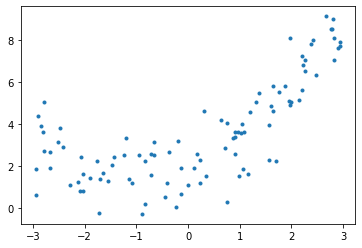

In [72]:
import matplotlib.pyplot as plt
plt.plot(X,y,".")

Clearly, a st.line will never fit this data properly. So let's use scikit-learn's PolynomialFeatures class to tansform our training data by adding the square(2nd degree polynomial) of each feature in the training set as new feature

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [75]:
X_poly = poly_features.fit_transform(X)

In [76]:
X[0]

array([0.76159153])

In [77]:
X_poly[0]

array([0.76159153, 0.58002166])

X_poly contains the original feature of X plus the square of the feature, now we can fit a LinearRegression model to this extended training data 

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [79]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.95548935]), array([[0.93512571, 0.45845817]]))

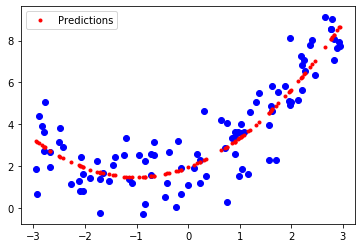

In [80]:
plt.scatter(X,y, color= "blue")
plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)),".", color = "r", label = "Predictions")
plt.legend()

In [81]:
import pandas as pd

# Importing the dataset

datas = pd.read_csv("pokemon.csv")
datas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [83]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [84]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [85]:
X = iris["data"][:,3:]  # petal width taken
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [86]:
import cv2
img = cv2.imread("C:\\Users\\rgukt\\Desktop\\1.jpg")
cv2.imshow("sumana_wind", img)
print(img)
cv2.waitKey()
cv2.destroyAllWindows()

[[[ 71 153 118]
  [ 71 153 118]
  [ 72 154 119]
  ...
  [ 72 110 115]
  [ 70 108 113]
  [ 70 108 113]]

 [[ 71 153 118]
  [ 71 153 118]
  [ 72 154 119]
  ...
  [ 72 110 115]
  [ 71 107 113]
  [ 69 107 112]]

 [[ 71 153 118]
  [ 72 154 119]
  [ 73 155 120]
  ...
  [ 73 109 115]
  [ 73 107 113]
  [ 70 106 112]]

 ...

 [[ 11  28  19]
  [ 11  28  19]
  [ 11  28  19]
  ...
  [ 55 108  98]
  [ 56 109  99]
  [ 56 109  99]]

 [[ 11  28  19]
  [ 11  28  19]
  [ 11  28  19]
  ...
  [ 55 108  98]
  [ 56 109  99]
  [ 56 109  99]]

 [[ 10  27  18]
  [ 10  27  18]
  [ 11  28  19]
  ...
  [ 53 106  96]
  [ 53 106  96]
  [ 54 107  97]]]
